<h3>Importing Libaries</h3>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

<h3>Loading the Dataset</h3>

In [92]:
tmr_data_df = pd.read_csv('/home/hp/Desktop/TMR-EDA/Data/encoded_tmr_data.csv')
tmr_data_df.head()

,RFP % Present,RFP Last Status,RFP Last Internal Rating,RFP Last TRACK Score,RFP Tech Ability \n(Out of 2),RFP- Learnability \n(Out of 2),RFP-Communicability \n(Out of 1),RFP Avg TRACK Score,Last Graduation,Year,TechCategory,Trial % Present,Trial Avg TRACK Score,Trial Communicability Score (Out of 1.0),Trial Last Internal Rating,Trial Learnability Score (Out of 2.0),Trial Techability Score (Out of 2.0)
0,76.0,2,2,0.00,1.68,1.72,0.86,4.26,0,2019.0,3,100.00,3.69,0.59,3,1.475,1.625
1,89.0,0,1,3.60,1.22,1.51,0.67,3.40,1,2020.0,2,100.00,3.23,0.62,2,1.050,1.560
2,79.0,0,2,4.40,1.74,1.75,0.93,4.42,1,2020.0,3,84.62,4.46,0.94,2,1.790,1.730
3,97.0,1,1,3.32,1.21,1.29,0.74,3.24,1,2020.0,1,92.31,3.98,1.00,1,1.580,1.400
4,76.0,0,2,4.28,1.59,1.66,0.88,4.13,1,2020.0,2,84.62,3.92,1.00,1,1.520,1.400


<h3>Renaming the columns</h3>

In [93]:
tmr_data_df = tmr_data_df.rename(columns={ 
                                           'RFP Tech Ability \n(Out of 2)':'RFP Tech Ability',
                                           'RFP- Learnability \n(Out of 2)':'RFP- Learnability',
                                           'RFP-Communicability \n(Out of 1)':'RFP-Communicability',
                                           'Trial Techability Score (Out of 2.0)':'Trial Techability Score',
                                           'Trial Learnability Score (Out of 2.0)':'Trial Learnability Score',
                                           'Trial Communicability Score (Out of 1.0)':'Trial Communicability Score'
                                        })
tmr_data_df.head(3)

,RFP % Present,RFP Last Status,RFP Last Internal Rating,RFP Last TRACK Score,RFP Tech Ability,RFP- Learnability,RFP-Communicability,RFP Avg TRACK Score,Last Graduation,Year,TechCategory,Trial % Present,Trial Avg TRACK Score,Trial Communicability Score,Trial Last Internal Rating,Trial Learnability Score,Trial Techability Score
0,76.0,2,2,0.0,1.68,1.72,0.86,4.26,0,2019.0,3,100.00,3.69,0.59,3,1.475,1.625
1,89.0,0,1,3.6,1.22,1.51,0.67,3.40,1,2020.0,2,100.00,3.23,0.62,2,1.050,1.560
2,79.0,0,2,4.4,1.74,1.75,0.93,4.42,1,2020.0,3,84.62,4.46,0.94,2,1.790,1.730


<h2>Various Feature Selection Techniques</h2>

### Univariate Selection

In [94]:
y = tmr_data_df['TechCategory']
X = tmr_data_df.drop(columns='TechCategory', axis=1)

In [98]:
# Applying SelectKBest Algo
ordered_rank_features = SelectKBest(score_func=chi2,k=16)
ordered_features = ordered_rank_features.fit(X,y)

In [99]:
ordered_features

SelectKBest(k=16, score_func=<function chi2 at 0x7fdf84d7ddc0>)

In [100]:
ordered_features.scores_

array([1.77933302e+01, 8.84614111e+00, 2.53458257e+01, 3.12817561e+00,
       4.90408725e+00, 3.47728409e+00, 1.65658294e+00, 9.87962648e+00,
       1.36612236e+00, 9.08914379e-03, 1.28946200e+01, 5.11966218e+00,
       1.04738808e+00, 1.29306580e+01, 2.25617152e+00, 2.48718195e+00])

In [101]:
dfscores = pd.DataFrame(ordered_features.scores_,columns=['score'])
dfcolumns = pd.DataFrame(X.columns)

In [121]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['features','score']
features_rank

,features,score
0,RFP % Present,17.793330
1,RFP Last Status,8.846141
2,RFP Last Internal Rating,25.345826
3,RFP Last TRACK Score,3.128176
4,RFP Tech Ability,4.904087
5,RFP- Learnability,3.477284
6,RFP-Communicability,1.656583
7,RFP Avg TRACK Score,9.879626
8,Last Graduation,1.366122
9,Year,0.009089


In [124]:
# Top 10 features
features = features_rank.nlargest(16,'score')
feature = list(features['features'])
print(feature)

['RFP Last Internal Rating', 'RFP % Present', 'Trial Last Internal Rating', 'Trial % Present', 'RFP Avg TRACK Score', 'RFP Last Status', 'Trial Avg TRACK Score', 'RFP Tech Ability', 'RFP- Learnability', 'RFP Last TRACK Score', 'Trial Techability Score', 'Trial Learnability Score', 'RFP-Communicability', 'Last Graduation', 'Trial Communicability Score', 'Year']


### Feature Importance

This technique is used to give you score for each feature the higher the score the more relevant the feature

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [105]:
model.feature_importances_

array([0.07104342, 0.03137283, 0.03436206, 0.06731612, 0.08525931,
       0.08233144, 0.07718741, 0.10141493, 0.05008207, 0.05831745,
       0.05003589, 0.0597718 , 0.06266291, 0.04399695, 0.063385  ,
       0.06146041])

In [106]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10)

RFP Avg TRACK Score            0.101415
RFP Tech Ability               0.085259
RFP- Learnability              0.082331
RFP-Communicability            0.077187
RFP % Present                  0.071043
RFP Last TRACK Score           0.067316
Trial Learnability Score       0.063385
Trial Communicability Score    0.062663
Trial Techability Score        0.061460
Trial Avg TRACK Score          0.059772
dtype: float64

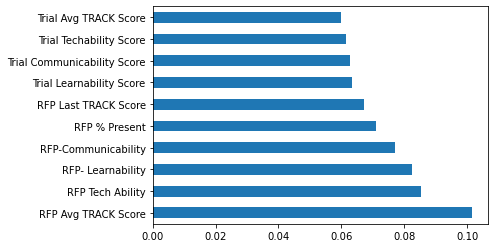

In [107]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Correlation

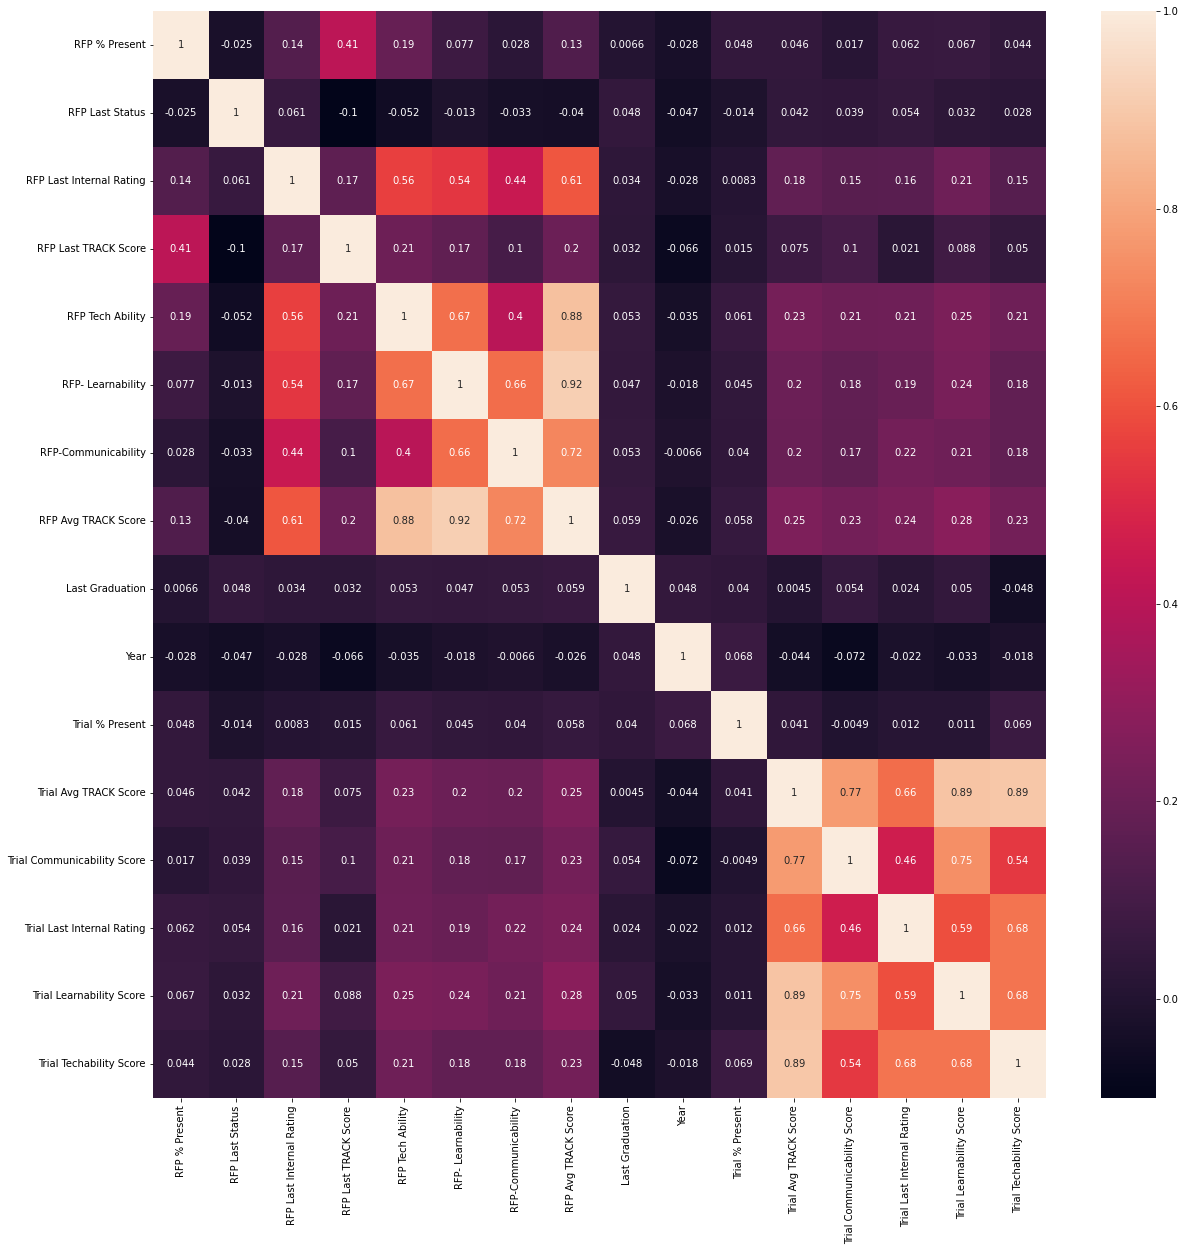

In [108]:
corr = X.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)
plt.show()

In [109]:
threshold=0.6

In [110]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #we are interested abs correlation value
                colname = corr_matrix.columns[i]  # getting the name of the column
                col_corr.add(colname)
    return col_corr

In [111]:
correlation(X,threshold)

{'RFP Avg TRACK Score',
 'RFP- Learnability',
 'RFP-Communicability',
 'Trial Communicability Score',
 'Trial Last Internal Rating',
 'Trial Learnability Score',
 'Trial Techability Score'}

### Information Gain

In [112]:
from sklearn.feature_selection import mutual_info_classif

In [113]:
mutual_info_values = mutual_info_classif(X,y)

In [114]:
mutual_data = pd.Series(mutual_info_values, index=X.columns)
mutual_data.sort_values(ascending=False)

RFP Avg TRACK Score            0.173681
RFP- Learnability              0.118759
RFP Tech Ability               0.111839
RFP Last Internal Rating       0.110875
RFP Last TRACK Score           0.100355
RFP-Communicability            0.099751
RFP Last Status                0.064195
Trial Avg TRACK Score          0.055619
Trial Last Internal Rating     0.045980
Trial Techability Score        0.045194
Trial % Present                0.028353
Last Graduation                0.027662
Year                           0.011129
RFP % Present                  0.008190
Trial Learnability Score       0.006698
Trial Communicability Score    0.000000
dtype: float64